# Kaggle

A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

## Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

## Domain: E-commerce

#### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

#### Attribute Description
InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
StockCode Product (item) code
Description Product (item) name
Quantity The quantities of each product (item) per transaction
InvoiceDate The day when each transaction was generated
UnitPrice Unit price (Product price per unit)
CustomerID Customer number (Unique ID assigned to each customer)
Country Country name (The name of the country where each customer resides)
Analysis tasks to be performed:
Use the clustering methodology to segment customers into groups:
Use the following clustering algorithms:

#### K means
Hierarchical
• Identify the right number of customer segments.
• Provide the number of customers who are highly valued.
• Identify the clustering algorithm that gives maximum accuracy and explains robust clusters.
• If the number of observations is loaded in one of the clusters, break down that cluster further using the clustering algorithm. [ hint: Here loaded means if any cluster has more number of data points as compared to other clusters then split that clusters by increasing the number of clusters and observe, compare the results with previous results.]

# Planning IOT (input | output | tasks)

1. Input 

    - Select the MOST VALUABLE CLIENTS t}o engage in a fidellity program called "insiders", using sells data from November/2015 to December/2017

2. Output

    - Point out the customers who are most likelly to be a part of the program "INSIDERS"
    - Report the answers to the following questions:
        -- Who is ellegible for the program?
        
        -- How many clients are going to be a part of the program?
        
        -- Which are the main characteristics of these clients?
        
        -- What is the percentage of revenue coming from this group contribution?
        
        -- What is the expectation of revenue coming from this group for the next few months?
        
        -- Which are the conditions for a person to be elegible to this program?
        
        -- Which are the conditions for a person to be removed from this program?
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
        -- Which actions can the marketing team take to increase revenue?
        
3. Tasks

    - Sugesting solutions:
    
        -- Who is ellegible? What defines elligibility? Who is a valuable customer to the company?
        
            * Revenue:
                ** High LTV value
                ** High frequency
                ** Large basket size
                ** Low churn probability
                ** High LTV previsibility
                
            * Cost:
                ** Low devolution number
                
            * Experience:
                ** Good feedback 
        -- How many clients are going to be a part of the program?
        
            * Number of clients
            * % to the total number of clients
        
        -- Which are the main characteristics of these clients?
        
            * Main attributes of clients:
                ** Age
                ** Country
                ** Salary
            
            * Main shopping behaviours
        
        -- What is the percentage of revenue coming from this group contribution?
            
            * Calculate company´s total revenue
            * Calculate INSIDERS cluster revenue
        
        -- What is the expectation of revenue coming from this group for the next few months?
            
            * Calculate LTV of INSIDERS cluster
            * Time series (ARMA, ARIMA, HoltWinter, etc)
        
        -- Which are the conditions for a person to be elegible to this program?
            
            * When is the evaluation taking place?
            * Is the client´s behaviour close to the INSIDERS cluster?
        
        -- Which are the conditions for a person to be removed from this program?
        
            * CLient´s behaviour is not close to the average of INSIDERS cluster
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
            * Hypothesis test
            * A/B test
        
        -- Which actions can the marketing team take to increase revenue?
        
            * Discounts
            * Exclusive products
        



# 0. Imports

## Libraries

In [248]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss
import re

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

# import umap
import umap

# sklearn
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from sklearn import mixture as mx

# metrics
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Functions

In [56]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()
    
    # yellowbrick
    yellowbrick.style.rcmod.set_aesthetic()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [57]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## Data

In [194]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding="iso8859-1")

In [195]:
df_raw = df_raw.drop(columns=["Unnamed: 8"])

# 1. Descriptive Analysis 

In [196]:
df1 = df_raw.copy()

In [197]:
df1

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom
1         536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39     17850.0  United Kingdom
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39     17850.0  United Kingdom
...          ...       ...                                  ...       ...         ...        ...         ...             ...
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12    7-Dec-17       0.85     12680.0          France
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6    7-Dec-17       2.10     12680.0          France
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4    7-Dec-17       4.15     12680.0          France
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4    7-Dec-17       4.15     12680.0          France
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3    7-Dec-17       4.95     12680.0          France

[541909 rows x 8 columns]

## 1.1. Rows and Columns

In [198]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  541909
Number of columns:  8


In [199]:
# rename columns
snakecase = lambda x: inflection.underscore(x)
df1.columns = list(map(snakecase, df1.columns))

## 1.2. Data Types

In [200]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.3. Check NA

In [201]:
df1['customer_id'].isna().sum()

135080

In [65]:
df1.isna().sum()/df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### Fill NA

In [66]:
# replacing customer_id or dropping?
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [75]:
print(df_not_missing['customer_id'].min())
print(df_not_missing['customer_id'].max())

12346.0
18287.0


In [76]:
# create customer_id for each unique invoice_no (purchase event) associated with a null customer_id, that will invalidade the creation of recency and frquency features for these customers. 
# That may be a possibility for filling null values but may also create distortions in the cluster analysis in the future
# Therefore, this part of the code might be invalidated later and serves only as an example of NA fillout when dropping rows reduces a considerable part of the data 
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1) # customer_id.max() = 18287

# merge original with reference dataframe
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

In [78]:
# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)

df1.head(5)

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6    29-Nov-16        2.55  United Kingdom      17850.0
1     536365      71053                  WHITE METAL LANTERN         6    29-Nov-16        3.39  United Kingdom      17850.0
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8    29-Nov-16        2.75  United Kingdom      17850.0
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6    29-Nov-16        3.39  United Kingdom      17850.0
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6    29-Nov-16        3.39  United Kingdom      17850.0

In [79]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.4. Change dtypes

In [80]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39  United Kingdom        17850

In [81]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.5. Descriptive Statistics

In [82]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

### Numerical Attributes

attributes       min      max      range          mean    median          std        skew       kurtosis
0     quantity -80995.00  80995.0  161990.00      9.552250      3.00   218.080957   -0.264076  119769.160031
1   unit_price -11062.06  38970.0   50032.06      4.611114      2.08    96.759764  186.506972   59005.719097
2  customer_id  12346.00  22709.0   10363.00  16688.840453  16249.00  2911.408666    0.487449      -0.804287

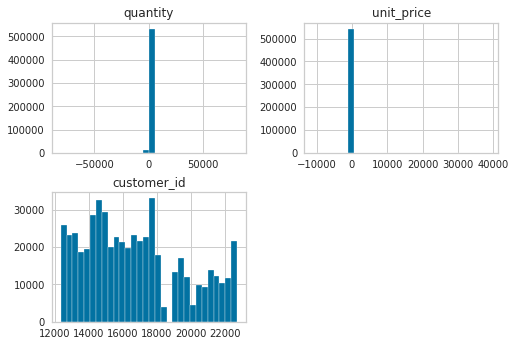

In [83]:
num_analysis(num_attributes)

# negative quantity? may be devolution
# unitary price equal to zero and negative?

### Categorical Attributes

In [48]:
cat_attributes.apply(lambda x: x.unique().shape)

invoice_no  stock_code  description  invoice_date  country
0       25900        4070         4224           305       38

### Invoice No

In [89]:
df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :] # invoice_no with letters

invoice_no stock_code                       description  quantity invoice_date  unit_price         country  customer_id
141       C536379          D                          Discount        -1   2016-11-29       27.50  United Kingdom        14527
154       C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   2016-11-29        4.65  United Kingdom        15311
235       C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65  United Kingdom        17548
236       C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29  United Kingdom        17548
237       C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29  United Kingdom        17548
...           ...        ...                               ...       ...          ...         ...             ...          ...
540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   2017-12-07        0.83  United Kingdom        14397
541541    C581499          M                            Manual        -1   2017-12-07      224.69  United Kingdom        15498
541715    C581568      21258        VICTORIAN SEWING BOX LARGE        -5   2017-12-07       10.95  United Kingdom        15311
541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   2017-12-07        1.25  United Kingdom        17315
541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   2017-12-07        1.25  United Kingdom        17315

[9291 rows x 8 columns]

In [90]:
df_aux = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

print('Number of invoices with letters: {}'.format(len(df_aux)))
print('Number of invoices with letters and negative quantity: {}'.format(len(df_aux[df_aux['quantity'] < 0])))

Number of invoices with letters: 9291
Number of invoices with letters and negative quantity: 9288


### Stock Code

In [101]:
# check stock codes with only characters
df_aux2 = df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :]
df_aux2
# ação
# 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

invoice_no stock_code     description  quantity invoice_date  unit_price         country  customer_id
45         536370       POST         POSTAGE         3   2016-11-29       18.00          France        12583
141       C536379          D        Discount        -1   2016-11-29       27.50  United Kingdom        14527
386        536403       POST         POSTAGE         1   2016-11-29       15.00     Netherlands        12791
1123       536527       POST         POSTAGE         1   2016-11-29       18.00         Germany        12662
1814       536544        DOT  DOTCOM POSTAGE         1   2016-11-29      569.77  United Kingdom        19001
...           ...        ...             ...       ...          ...         ...             ...          ...
541540     581498        DOT  DOTCOM POSTAGE         1   2017-12-07     1714.17  United Kingdom        22709
541541    C581499          M          Manual        -1   2017-12-07      224.69  United Kingdom        15498
541730     581570       POST         POSTAGE         1   2017-12-07       18.00         Germany        12662
541767     581574       POST         POSTAGE         2   2017-12-07       18.00         Germany        12526
541768     581578       POST         POSTAGE         3   2017-12-07       18.00         Germany        12713

[2759 rows x 8 columns]

In [122]:
print('Unique stock codes with letters: {}'.format(df_aux2['stock_code'].unique()))
print('Percentage of unique stock codes with letters: {}'.format(df_aux2['stock_code'].shape[0] / df1.shape[0]))
print('Percentage of: {}'.format(len(df_aux2[df_aux2['quantity'] < 0]) / len(df_aux2)))

Unique stock codes with letters: ['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']
Percentage of unique stock codes with letters: 0.005091260709823974
Percentage of: 0.20188474084813338


### Description

In [139]:
df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39  United Kingdom        17850

### Country

<AxesSubplot:xlabel='country', ylabel='count'>

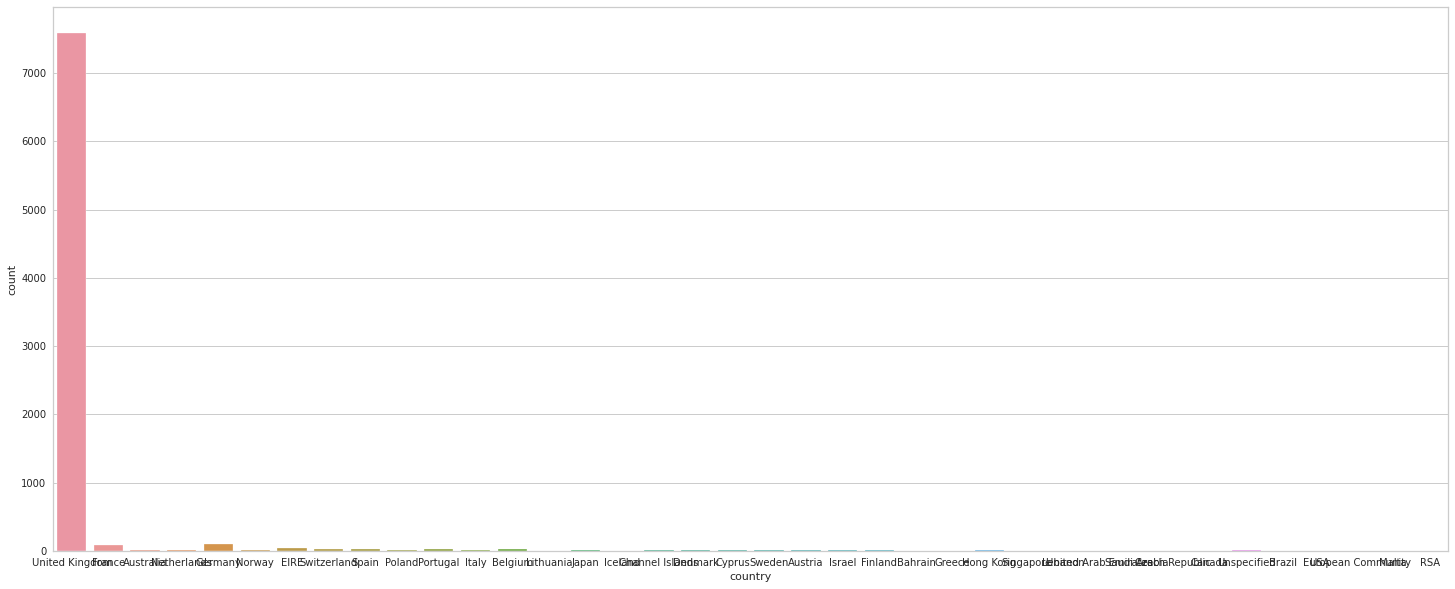

In [159]:
plt.figure(figsize=[25,10])
df_aux4 = df1[['customer_id', 'country']].drop_duplicates()
sns.countplot(x='country',data=df_aux4)

In [163]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id', ascending=False)

customer_id
country                          
United Kingdom               7587
Germany                        95
France                         90
EIRE                           44
Spain                          31
Belgium                        25
Switzerland                    24
Portugal                       20
Italy                          15
Hong Kong                      15
Finland                        12
Austria                        11
Norway                         10
Netherlands                     9
Australia                       9
Unspecified                     9
Denmark                         9
Channel Islands                 9
Cyprus                          8
Sweden                          8
Japan                           8
Israel                          7
Poland                          6
Canada                          4
USA                             4
Bahrain                         4
Greece                          4
Malta                           2
United Arab Emirates            2
Czech Republic                  1
Lithuania                       1
European Community              1
Lebanon                         1
RSA                             1
Saudi Arabia                    1
Singapore                       1
Iceland                         1
Brazil                          1

In [162]:
df1['country'].unique() # european comunnity  # Unspecified

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# 2. Filter

In [160]:
df2 = df1.copy()

In [161]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [167]:
# numerical attributes
df2 = df2.loc[df2['unit_price'] >= 0.04, :]
# categorical attributes
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]
# description
df2 = df2.drop(columns='description', axis=1)
# map
df2 = df2[~df2['stock_code'].isin(['European Community',  'Unspecified'])]
# bad customer ( devolution and small basket)
df2 = df2[~df2['customer_id'].isin([16446])]
# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# 3. Feature Engineering

In [174]:
df3 = df2.copy()
# df2.to_csv('../data/interim/df2.csv')
df3

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
0          536365     85123A         6   2016-11-29        2.55  United Kingdom        17850
1          536365      71053         6   2016-11-29        3.39  United Kingdom        17850
2          536365     84406B         8   2016-11-29        2.75  United Kingdom        17850
3          536365     84029G         6   2016-11-29        3.39  United Kingdom        17850
4          536365     84029E         6   2016-11-29        3.39  United Kingdom        17850
...           ...        ...       ...          ...         ...             ...          ...
541904     581587      22613        12   2017-12-07        0.85          France        12680
541905     581587      22899         6   2017-12-07        2.10          France        12680
541906     581587      23254         4   2017-12-07        4.15          France        12680
541907     581587      23255         4   2017-12-07        4.15          France        12680
541908     581587      22138         3   2017-12-07        4.95          France        12680

[536643 rows x 7 columns]

In [175]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref

customer_id
0           17850
1           13047
2           12583
3           13748
4           15100
...           ...
5791        22706
5792        22707
5793        22708
5794        22709
5795        12713

[5796 rows x 1 columns]

### 1. Monetary

In [178]:
# gross revenue - Quantity x price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']
                                
# monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [179]:
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 2. Recency

In [181]:
# days from last purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3. Number of purchases

In [183]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_items       91
qtde_invoices    91
dtype: int64

### 4. Total number of products

In [ ]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

### 5. Number of types of products

In [184]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_items       91
qtde_invoices    91
qtde_products    91
dtype: int64

### 6. Average ticket value

In [185]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_items       91
qtde_invoices    91
qtde_products    91
avg_ticket       91
dtype: int64

### 7. Average recency days

In [186]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_items            91
qtde_invoices         91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
dtype: int64

### 8. Purchase frequency

In [187]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_items            91
qtde_invoices         91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency             91
dtype: int64

### 9. Number of returns

In [188]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_items            91
qtde_invoices         91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency             91
qtde_returns           0
dtype: int64

### 10. Basket size

- Invoice No = purchase
- Stock Code = Product
- Quantity = Item

In [189]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_items            91
qtde_invoices         91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 11. Unique basket size

In [190]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_items                  91
qtde_invoices               91
qtde_products               91
avg_ticket                  91
avg_recency_days          2822
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [191]:
df_ref

customer_id  gross_revenue  recency_days  qtde_items  qtde_invoices  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0           17850        5391.21         372.0      1733.0           34.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1           13047        3232.59          56.0      1390.0            9.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2           12583        6705.38           2.0      5028.0           15.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3           13748         948.25          95.0       439.0            5.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4           15100         876.00         333.0        80.0            3.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333
...           ...            ...           ...         ...            ...            ...         ...               ...        ...           ...              ...                     ...
5791        22706        5699.00           1.0      1747.0            1.0          634.0    8.988959               NaN   1.000000           0.0      1747.000000              634.000000
5792        22707        6756.06           0.0      2010.0            1.0          730.0    9.254877               NaN   1.000000           0.0      2010.000000              730.000000
5793        22708        3217.20           0.0       654.0            1.0           59.0   54.528814               NaN   1.000000           0.0       654.000000               56.000000
5794        22709        3950.72           0.0       731.0            1.0          217.0   18.206083               NaN   1.000000           0.0       731.000000              217.000000
5795        12713         794.55           0.0       505.0            1.0           37.0   21.474324               NaN   1.000000           0.0       505.000000               37.000000

[5796 rows x 12 columns]

In [202]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_items                  91
qtde_invoices               91
qtde_products               91
avg_ticket                  91
avg_recency_days          2822
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

# 4. EDA (Exploratory Data Analysis)

In [193]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_items                0
qtde_invoices             0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 1. Univariate Analysis

## 2. Bivariate Analysis

In [203]:
df42 = df4.drop('customer_id', axis=1)

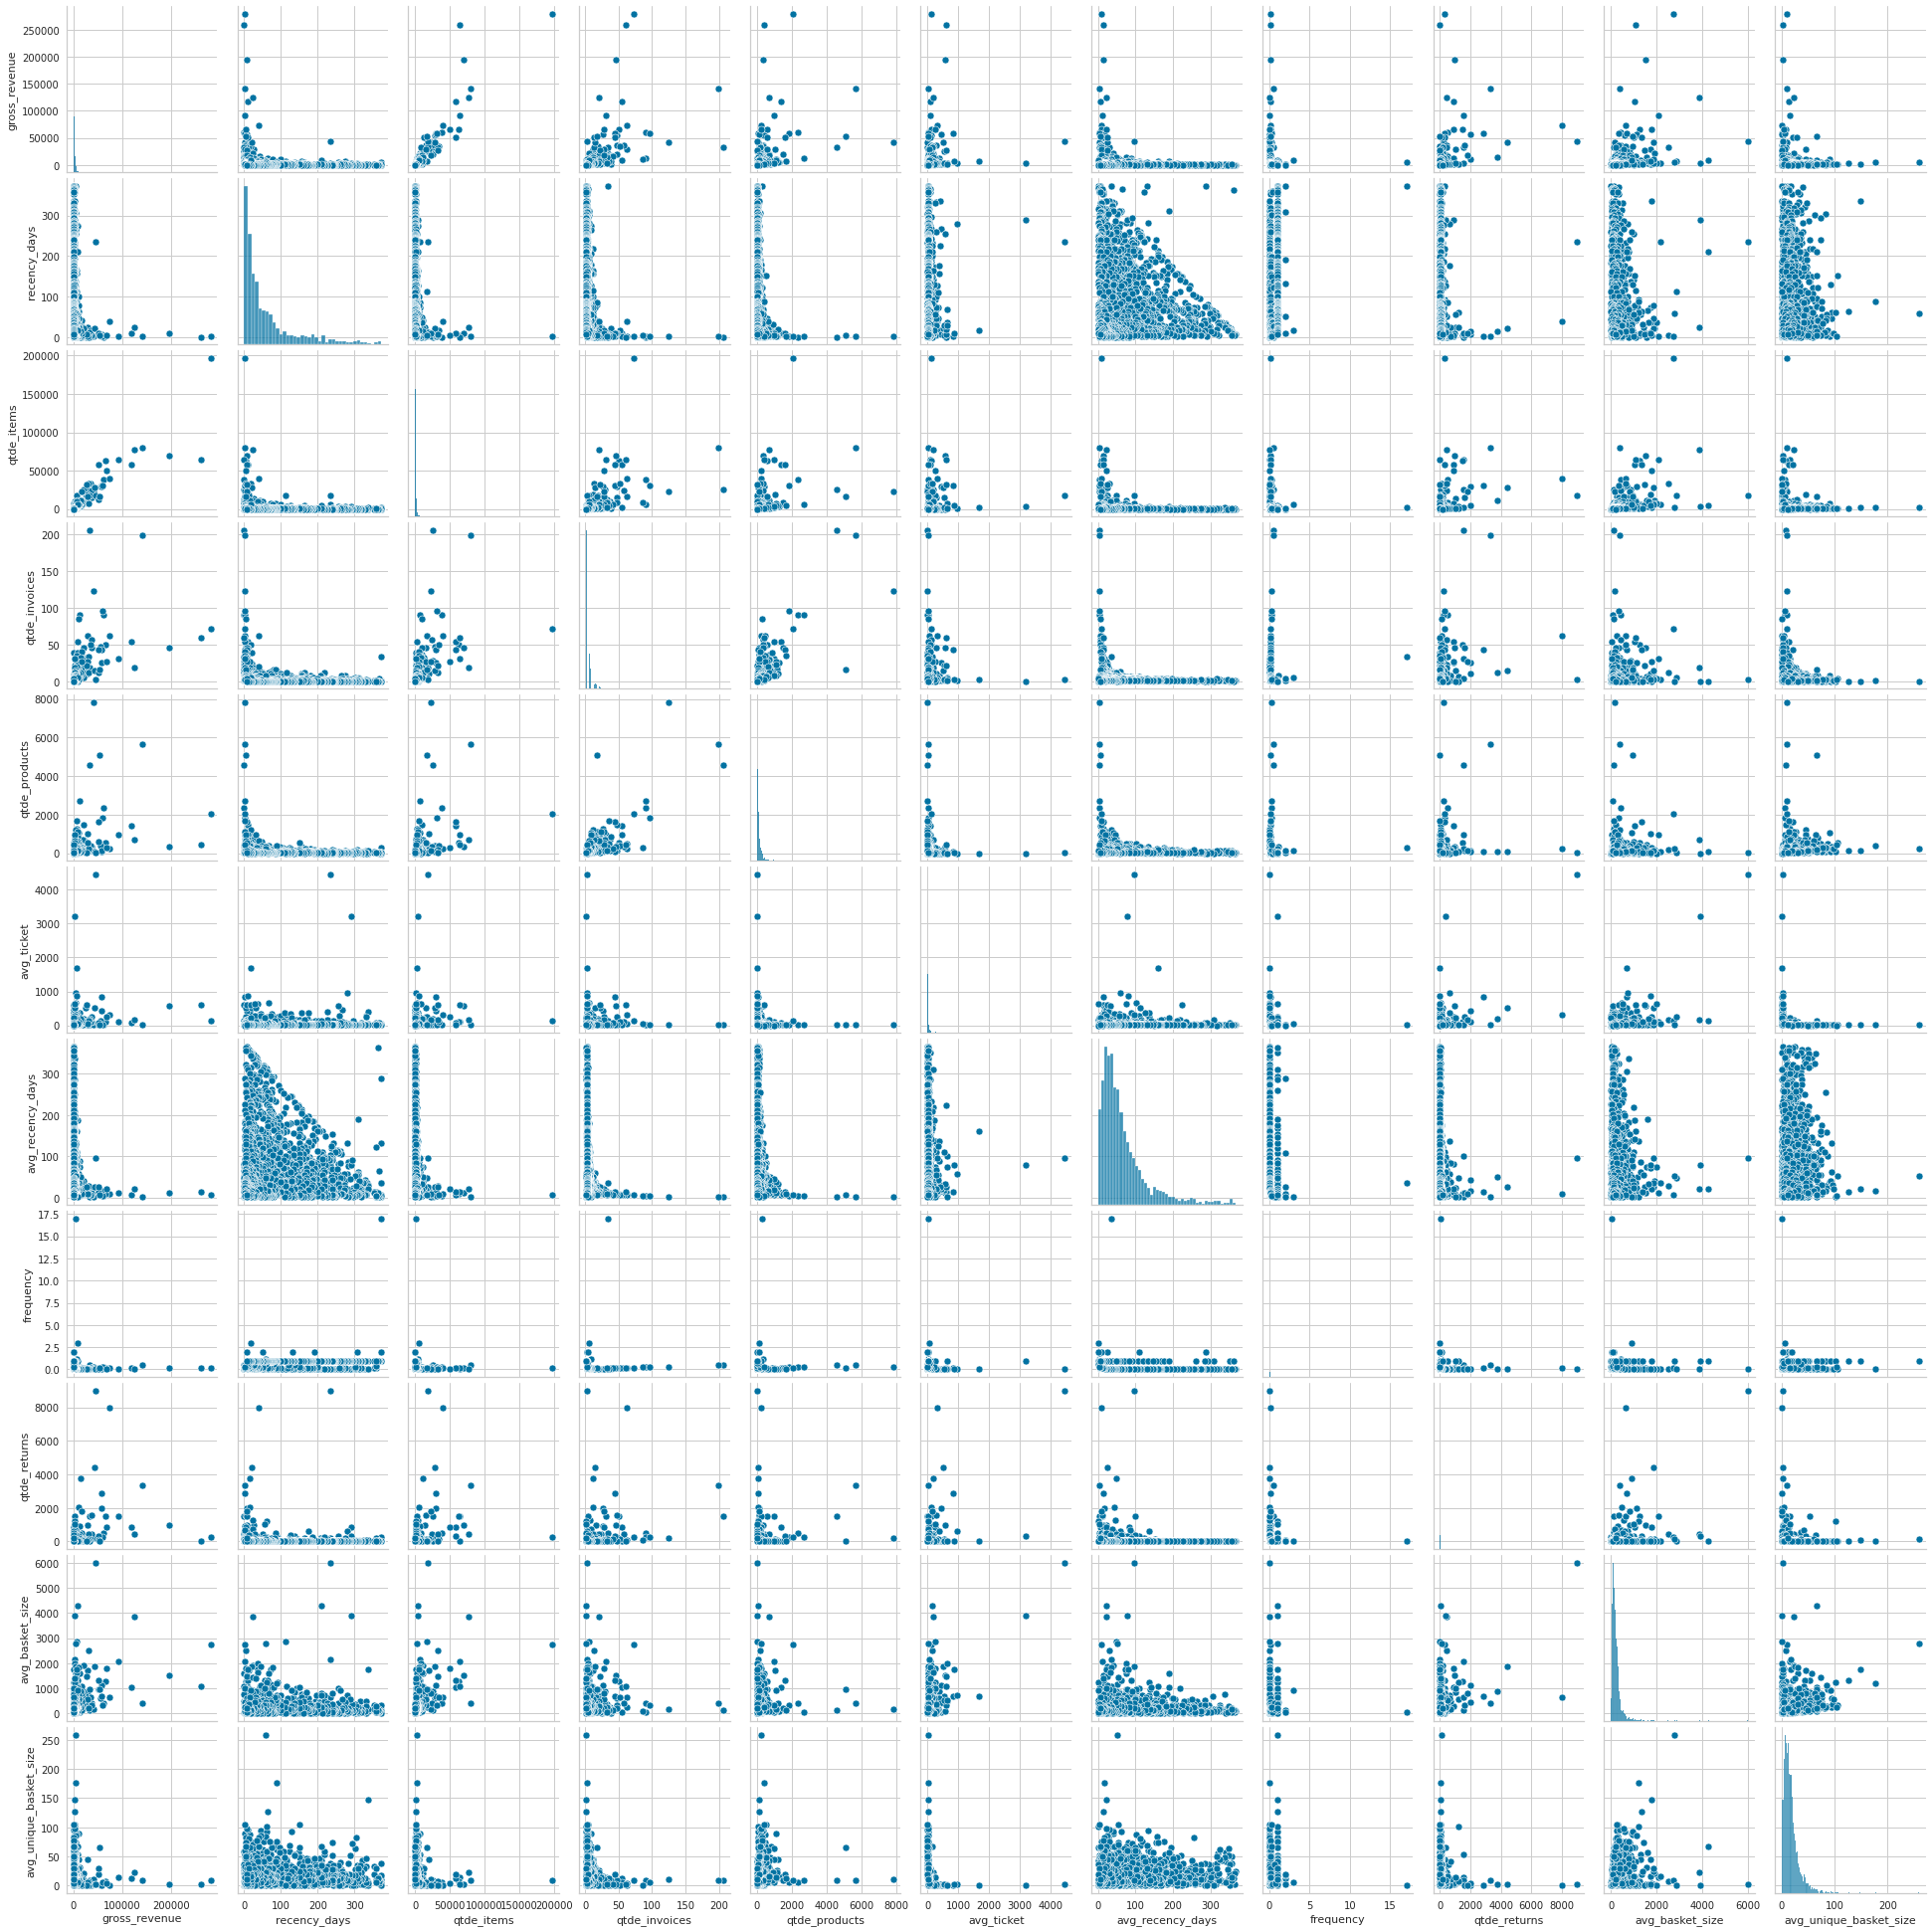

In [204]:
sns.pairplot(df42)

* Frequency and Avg Ticket both have low variance

## 3. Space Study

In [205]:
df4.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_items',
       'qtde_invoices', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [264]:
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_items',
       'qtde_invoices', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size']
df43 = df4[cols_selected].copy()

In [265]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days'] = mm.fit_transform(df43[['recency_days']])
df43['qtde_items'] = mm.fit_transform(df43[['qtde_items']])
df43['qtde_invoices'] = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_products'] = mm.fit_transform(df43[['qtde_products']])
df43['avg_ticket'] = mm.fit_transform(df43[['avg_ticket']])
df43['avg_recency_days'] = mm.fit_transform(df43[['avg_recency_days']])
df43['frequency'] = mm.fit_transform(df43[['frequency']])
df43['qtde_returns'] = mm.fit_transform(df43[['qtde_returns']])
df43['avg_basket_size'] = mm.fit_transform(df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

In [266]:
X.shape

(2972, 12)

### 3.1. PCA

In [269]:
pca = dd.PCA(n_components=3)
principal_components = pca.fit_transform(X)

<BarContainer object of 3 artists>

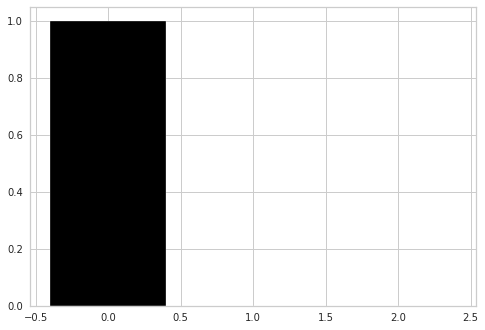

In [270]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

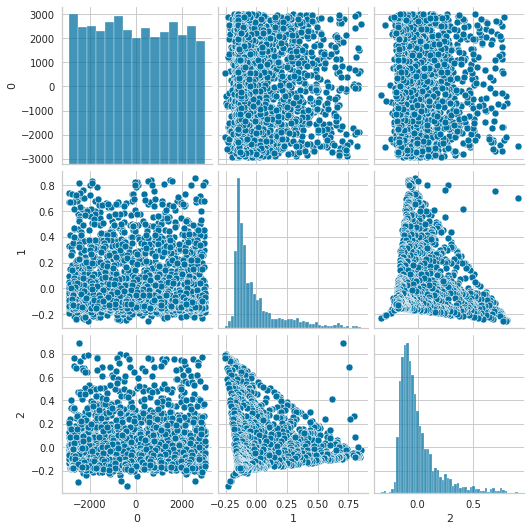

In [271]:
df_pca = pd.DataFrame(principal_components)
sns.pairplot(df_pca)

### 3.2. UMAP

In [272]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

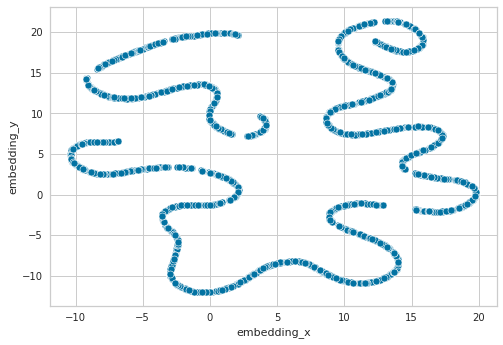

In [273]:
# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 3.3. t-SNE

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

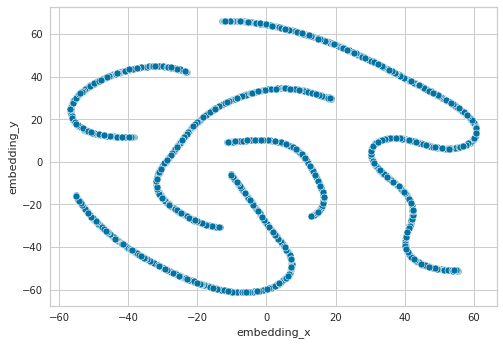

In [274]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 3.4. Tree-Based Embedding

* Article comparing Random forest and Extra-trees regressor for tree-based embedding - https://gdmarmerola.github.io/forest-embeddings/



In [275]:
# training dataset
X = df43.drop(['customer_id', 'gross_revenue'], axis=1)
y = df43['gross_revenue'].copy()

# model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# model training
rf_model.fit(X, y)

# leaf
df_leaf = pd.DataFrame(rf_model.apply(X))
df_leaf

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0     3149  3163  3338  3331  2257  3154  3123  3079  3129  3119  3154  3282  3114  3114  3125  3211  3109  3074  3087  3292  3005  3035  2917  3071  3340  3128  3272  2796  3121  2951  3319  3388  3078  3349  3156  3344  3418  3012  3097  2938  3335  3261  3219  3156  3177  3133  2824  3352  3401  3363  3200  3105  3085  3369  3327  3337  2854  3378  3258  3342  3432  3294  3169  2997  3196  3024  3124  3307  3145  3285  3353  3270  3228  3276  2799  3166  3349  3065  3201  3125  3042  3323  3383  3113  3305  3195  3289  3131  3089  3286  2928  2876  3100  2799  3449  3152  3245  3382  3363  3311
1     3111  2827  2982  2965  3022  3150  3120  2960  3080  3060  3104  2536  3101  3197  3014  3104  2752  2755  2801  2802  2959  3085  2888  3066  3017  3126  2868  3121  2521  3100  2876  2977  2969  2948  3117  2983  2948  2765  3073  2859  2971  2864  3006  3117  3095  3084  3136  2942  3011  2889  3170  3059  2907  2966  3009  3211  3154  3020  2885  2939  3011  2914  2813  2934  2847  2616  3035  2926  3090  2959  2949  2902  2954  2908  3101  2787  2925  3042  3178  3083  3039  2922  2949  2794  2941  3150  2912  3084  3096  2919  2542  2846  3067  2754  2933  3039  2896  2933  2975  3003
2     3572  3604  3590  3617  3577  3648  3570  3615  3542  3600  3598  3593  3598  3637  3538  3577  3603  3652  3534  3527  3516  3624  3658  3532  3490  3622  3529  3581  3410  3740  3452  3677  3606  3651  3585  3477  3545  3620  3599  3524  3653  3403  3686  3633  3610  3553  3590  3448  3634  3569  3632  3503  3597  3622  3671  3614  3613  3670  3553  3440  3649  3611  3587  3677  3496  3640  3656  3626  3590  3614  3567  3434  3586  3525  3642  3583  3577  3562  3563  3608  3543  3454  3618  3556  3552  3624  3586  3652  3554  3397  3607  3435  3532  3549  3613  3575  3534  3623  3471  3654
3     1420  2068  1593  1508  2169  1304  1545  1991  1204  1772  2062  2305  1531  1611  2064  1965  2262  1370  1956  1423  1858  2053  1540  1914  1281  2179  1301  1557  1859  1746  1490  1582  1394  1485  1527  1604  2186  2091  1698  1568  1543  1575  1578  1346  1698  1407  1541  1402   939  1670  1567  1587  1494  2159  2159  1485  1596  2151  1448  2053  1278  1513  2092  1629  1860  1417  2160  1808  1779  1400  2313  1577  1555  2191  1729  2070  1422  1595  1943  1948  1855  1347  1761  1509  2039  1541  1300  2081  1647  1572  1775  2052  2083  1484  1898  2254  1290  1840  2024  2130
4      198   724   184   698   191   440   216   702   186   183   571   688   218   841   150   185   587   239   602   727   728   562   435   161   842   767   601   331   149   757   722   233   185   332   210   763   354   183   601   588   571   192   319   600   615   566   907   667   695   593   606   912   360   502   201   199   577   217   676   588   209   755   706   199   706   420   571   566   679   715   235   190   330   815   722   486   230   463   158   183   591   872   597   305   587   183   585   751   199   678   317   165   697   121   191   108   570   717   727   211
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

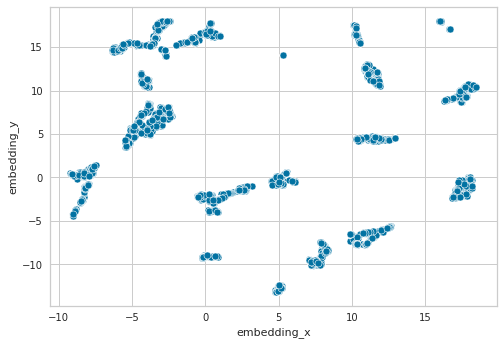

In [276]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree) # RandomForest seem to generate more defined clusters than ExtraTrees

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

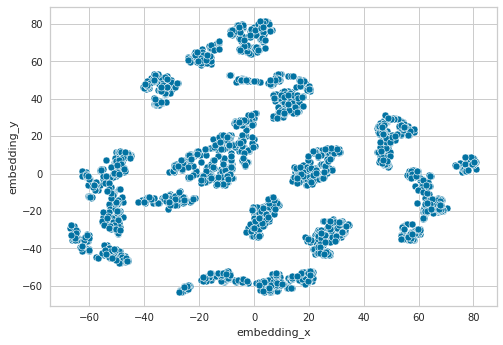

In [277]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree_2 = pd.DataFrame()
df_tree_2['embedding_x'] = embedding[:, 0]
df_tree_2['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree_2) # RandomForest seem to generate more defined clusters than ExtraTrees

# 5. Data Preparation 

In [31]:
# df5 = df4.copy()

# 6. Feature Selection

In [32]:
# df6 = df5.copy()

# 7. Hyper Parameter Fine Tuning

In [282]:
X = df_tree_2.copy()
X.head()

embedding_x  embedding_y
0     0.631333   -34.184654
1    17.338104    -0.658298
2    -2.599045   -58.372337
3    -4.416178    51.114536
4   -66.667000   -27.682467

In [283]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

In [284]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)
    
    # model predict
    labels = kmeans.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)    

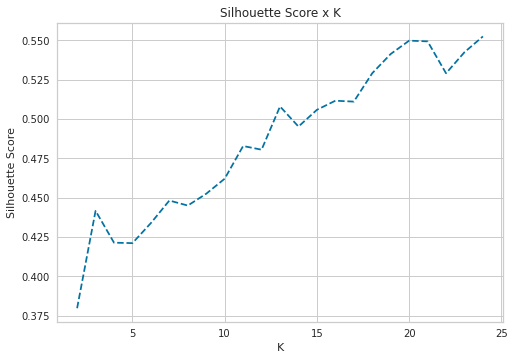

In [285]:
plt.plot(clusters, wss, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

In [249]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k)
    
    # model training
    gmm.fit(X)
    
    # model predict
    labels = gmm.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)    

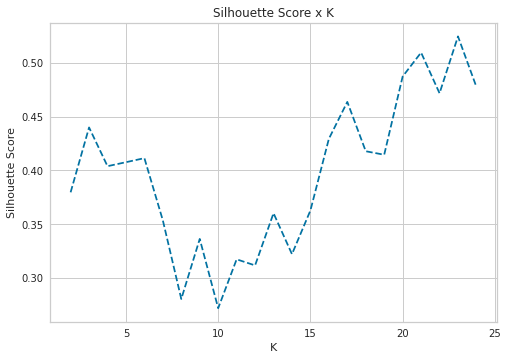

In [250]:
plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

In [255]:
from scipy.cluster import hierarchy as hc

In [258]:
hc_model = hc.linkage(X, 'ward')

In [286]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(X, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

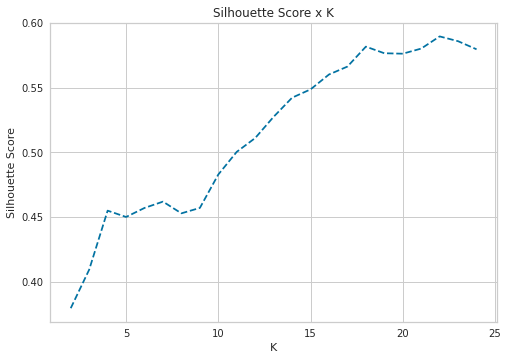

In [287]:
plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## 7.1. Silhouette Analysis

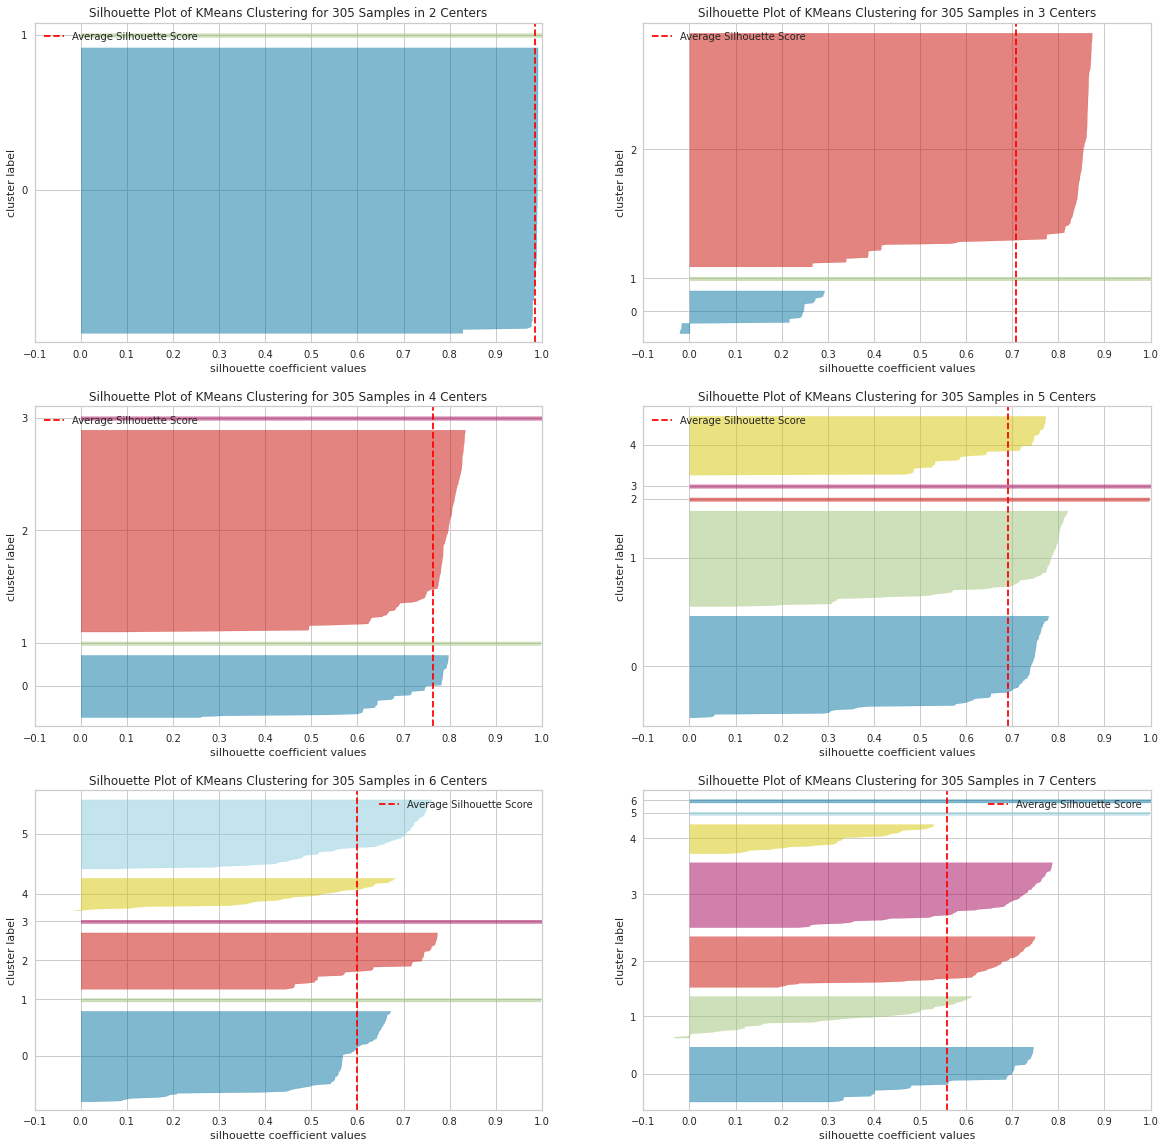

In [40]:
fig, ax = plt.subplots(3,2, figsize=(20,20))

for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = yellowbrick.cluster.SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# 9. Cluster Analysis

In [42]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

customer_id  gross_revenue  recency_days  invoice_no  avg_ticket  cluster
0        18144        2888.75           156          12     53.0944        2
1        17841       40340.78           324         169     15.2142        1
2        17841       40340.78           313         169     15.2142        1
3        17841       40340.78           299         169     15.2142        1
4        17841       40340.78           137         169     15.2142        1

## 9.1. Visualization Inspection

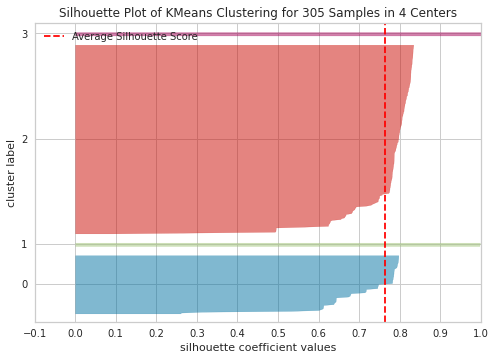

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 305 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
visualizer = yellowbrick.cluster.SilhouetteVisualizer(kmeans, colors='yellowbrick', )
visualizer.fit(X)
visualizer.show()

## 9.2. 2D Plot

In [44]:
df9.head()

customer_id  gross_revenue  recency_days  invoice_no  avg_ticket  cluster
0        18144        2888.75           156          12     53.0944        2
1        17841       40340.78           324         169     15.2142        1
2        17841       40340.78           313         169     15.2142        1
3        17841       40340.78           299         169     15.2142        1
4        17841       40340.78           137         169     15.2142        1

/home/lucas/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lucas/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lucas/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


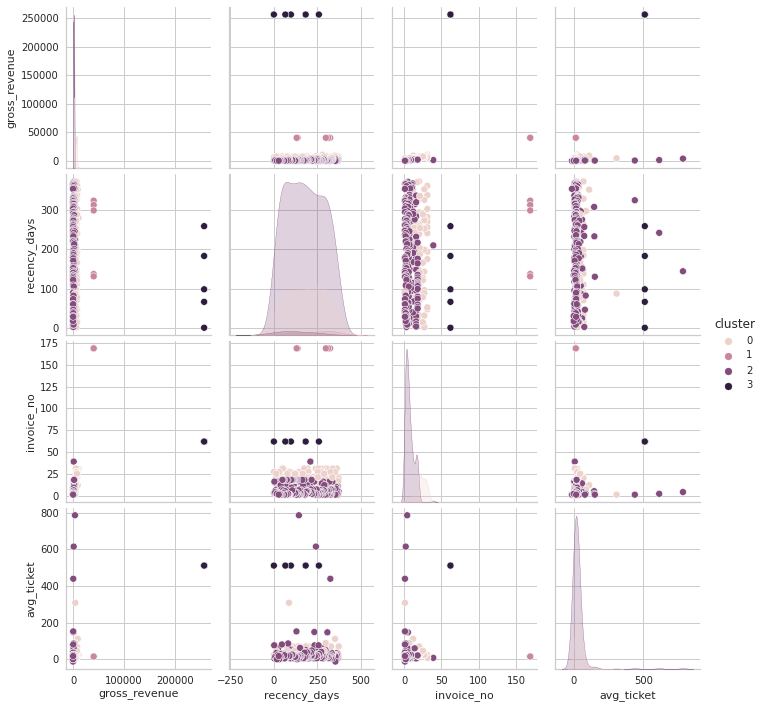

In [45]:
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## 9.3. UMAP - t-SNE
### Machine Learning - Manifold

PCA - MAtrix, Espaço de Distância - Espaço de Hilbert - 9 condições - Colorários

UMAP, t-SNE (2009), - MAnifold - Topologia

### UMAP

# 9.1. Visualization Inspection

In [46]:
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
fig.show()

## 9.2. Cluster Profile

### Number of Customers for Cluster and Percentage by Cluster

In [86]:
df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()

cluster  customer_id
0        0          225
1        1            5
2        2            5
3        3           70

In [98]:
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))
df_cluster

cluster  customer_id  perc_customer
0        0          225         73.770
1        1            5          1.639
2        2            5          1.639
3        3           70         22.951

### Average Gross Revenue

In [99]:
df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()

cluster  gross_revenue
0        0      1392.7752
1        1     40340.7800
2        2    256438.4900
3        3      6419.8200

In [100]:
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=3), how='inner', on='cluster')
df_cluster

cluster  customer_id  perc_customer  gross_revenue
0        0          225         73.770       1392.775
1        1            5          1.639      40340.780
2        2            5          1.639     256438.490
3        3           70         22.951       6419.820

### Average Recency Days

In [101]:
df_avg_recency_revenue = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=3), how='inner', on='cluster')
df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days
0        0          225         73.770       1392.775       178.929
1        1            5          1.639      40340.780       240.800
2        2            5          1.639     256438.490       121.200
3        3           70         22.951       6419.820       188.371

### Average Invoice N°

In [102]:
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_invoice_no, decimals=3), how='inner', on='cluster')
df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days  invoice_no
0        0          225         73.770       1392.775       178.929       7.062
1        1            5          1.639      40340.780       240.800     169.000
2        2            5          1.639     256438.490       121.200      62.000
3        3           70         22.951       6419.820       188.371      21.871

### Cluster 02 (Candidate to INSIDERS classification)

    -- Only 1.64% of costumers.
    -- Recency = 121 days average
    -- Average invoices: 62
    -- Gross Revenue: $ 256438.490	